<a href="https://www.kaggle.com/code/patimejia/soil-data-a-basic-python-pipeline?scriptVersionId=120767557" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction to Working with Soil Data in Python
### A Beginner's Guide to Generating, Manipulating, and Visualizing Soil Data Using NumPy, Pandas, and Matplotlib

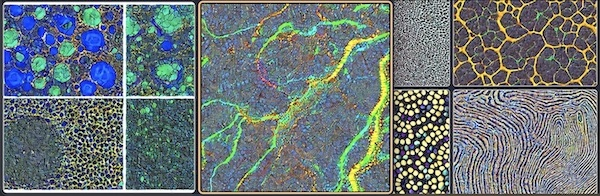

# Introduction

In this tutorial, we'll explore how to work with soil data in Python, a computer language. Soil data is information about the earth's soil, like its location, composition, and how well it can grow plants. By generating sample data with NumPy, organizing it in a Pandas DataFrame, and visualizing it using Matplotlib, we can identify which types of soil are most suitable for plant growth based on their pH level. This is important because it can help us make better decisions about what to plant and where.

# Abstract

| Tutorial Title | Introduction to Working with Soil Data in Python |
| -------------- | ----------------------------------------------- |
| Objective | Learn how to work with soil data in Python by generating random soil data using NumPy, creating a Pandas DataFrame, filtering and selecting data, and visualizing the data using Matplotlib. |
| Level | Basic |
| Prerequisites | Basic knowledge of Python programming |
| Key Techniques | NumPy, Pandas, Matplotlib, pd.cut, boolean indexing, scatter plot, bar graph |
| Target Audience | Beginners in Python programming and data analysis |
| Expected Duration | 5-15 minutes |
| Outcome | By the end of this tutorial, learners will have a good understanding of how to generate and analyze random soil data using Python libraries such as NumPy and Pandas. They will also be able to filter and select data, categorize it by pH level, and visualize the data using Matplotlib. |

# Content

| Section | Description |
| ------- | ----------- |
| Introduction | Overview of the tutorial and what we'll cover |
| Generating Random Soil Data | Using NumPy to generate random data for latitude, longitude, and pH values |
| Creating a Pandas DataFrame | Creating a DataFrame with the generated data |
| Filtering and Selecting Data | Filtering the data based on pH levels, selecting and filtering rows and columns based on their labels and integer positions, and using boolean indexing |
| Categorizing Data by pH Level | Using pd.cut to categorize data by pH level |
| Visualizing the Data | Creating a scatter plot and a bar graph to visualize the data |
| Further Readings | `PyArrow` and other popular libraries in Python |
| Conclusion | Summary of what we've learned and next steps |

# Generating Random Soil Data

In [1]:
import pandas as pd
import numpy as np

# Create some random data
num_samples = 100
latitudes = np.random.normal(37.7749, 0.1, size=num_samples)
longitudes = np.random.normal(-122.4194, 0.1, size=num_samples)
ph_values = np.random.normal(6.5, 1, size=num_samples)


In [2]:
# Test and display sample data
print("The first 5 latitudes are: {}".format(latitudes[:5]))
print("The first 5 longitudes are: {}".format(longitudes[:5]))
print("The first 5 ph_values are: {}".format(ph_values[:5]))


The first 5 latitudes are: [37.6933191  37.84521745 37.68608424 37.98058188 37.81289976]
The first 5 longitudes are: [-122.29419635 -122.41479355 -122.48141831 -122.34454413 -122.56714501]
The first 5 ph_values are: [5.52915765 5.00008963 7.37246836 4.80425569 6.92092951]


# Creating a Pandas DataFrame

In [3]:
soil_df = pd.DataFrame()
soil_df.head

<bound method NDFrame.head of Empty DataFrame
Columns: []
Index: []>

Add some values as rows

In [4]:
soil_df['latitude'] = latitudes
soil_df['longitude'] = longitudes
soil_df['ph_value'] = ph_values

soil_df.head()

,latitude,longitude,ph_value
0,37.693319,-122.294196,5.529158
1,37.845217,-122.414794,5.000090
2,37.686084,-122.481418,7.372468
3,37.980582,-122.344544,4.804256
4,37.812900,-122.567145,6.920930


# Selecting and Filtering Data

In [5]:
# Filter the data to only include samples with pH < 6
low_ph_soil = soil_df[soil_df['ph_value'] < 6]

# Print the first 5 rows of the filtered data with a title
print("The first 5 rows of the filtered data (pH < 6) are:") 
low_ph_soil.head()


The first 5 rows of the filtered data (pH < 6) are:


,latitude,longitude,ph_value
0,37.693319,-122.294196,5.529158
1,37.845217,-122.414794,5.000090
3,37.980582,-122.344544,4.804256
6,37.747461,-122.536951,5.494661
11,37.929431,-122.482786,5.650848


- The `loc` method allows you to select rows and columns based on their labels, whereas the `iloc` method allows you to select rows and columns based on their integer positions.
- Boolean indexing is another useful method for selecting and filtering data. You can use boolean indexing to select rows based on a specific condition or set of conditions.

# Categorizing Data by pH Level

In [6]:
# Define pH level bins and labels
ph_bins = [0, 6, 7, 14] # pH level ranges
ph_labels = ['acidic', 'neutral', 'alkaline'] # labels for the pH level ranges

# Bin the data using the pH level bins and labels. Add a new column to the DataFrame with the pH level grou
soil_df['ph_group'] = pd.cut(soil_df['ph_value'], ph_bins, labels=ph_labels)

In [7]:
# Print the first 5 rows of the new data with a title
print("The first 5 rows of the data with pH groups:")
soil_df.head()

The first 5 rows of the data with pH groups:


,latitude,longitude,ph_value,ph_group
0,37.693319,-122.294196,5.529158,acidic
1,37.845217,-122.414794,5.000090,acidic
2,37.686084,-122.481418,7.372468,alkaline
3,37.980582,-122.344544,4.804256,acidic
4,37.812900,-122.567145,6.920930,neutral


<AxesSubplot:title={'center':'Latitude and Longitude of Soil Samples Colored by pH Value'}, xlabel='longitude', ylabel='latitude'>

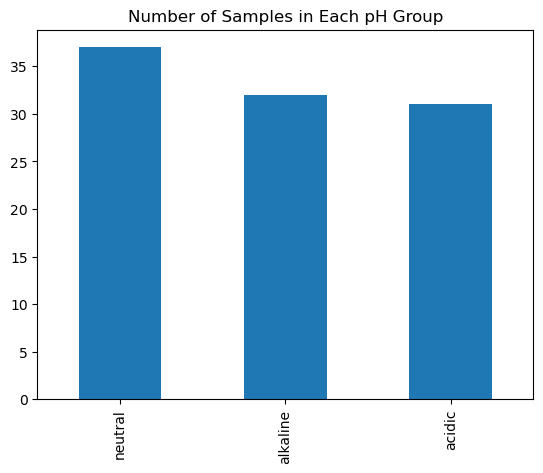

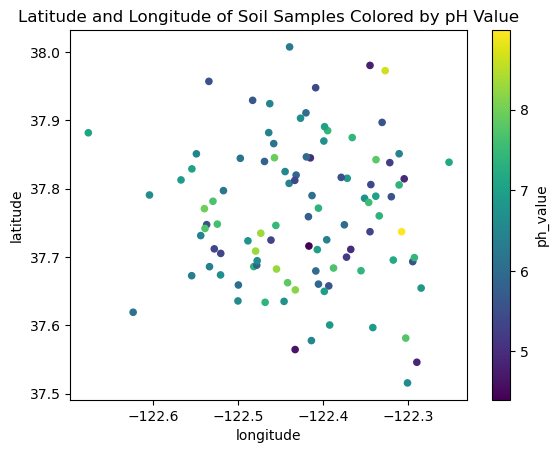

In [8]:
# Create an styled bar graph of the number of samples in each pH group
soil_df['ph_group'].value_counts().plot(kind='bar', title='Number of Samples in Each pH Group')

# Create a scatter plot of the latitude and longitude of the soil samples colored by pH group
soil_df.plot(kind='scatter', x='longitude', y='latitude', c='ph_value', colormap='viridis', title='Latitude and Longitude of Soil Samples Colored by pH Value')

# PyArrow vs Pandas: Key Data Differences

- `PyArrow` is designed to be more **memory-efficient** and can handle large data sets that are too big to fit in memory using **out-of-core processing**, advantageous  when working with large data sets. 
- Pandas is faster and more convenient for smaller data sets.

| Feature                          | PyArrow                                                          | Pandas                                                          |
|---------------------------------|-----------------------------------------------------------------|-----------------------------------------------------------------|
| Data Format                      | Columnar                                                       | Tabular                                                         |
| File Formats                     | Arrow, Parquet, CSV, JSON, Excel, SQL, etc.                     | CSV, Excel, SQL, HDF5, etc.                                     |
| Data I/O                         | Efficient for columnar data processing and serialization       | Designed for tabular data manipulation and analysis             |
| Memory Efficiency                | Designed for out-of-core processing and memory efficiency       | Designed for in-memory processing                               |
| Performance Optimization         | Parallel processing and optimized for large data sets           | Built-in functions for tabular data analysis and manipulation    |
| Flexibility and User-friendliness| Less flexible and requires some programming knowledge           | More user-friendly and accessible to a wider audience            |
| Machine Learning Integration     | Can be used in conjunction with other ML libraries like PyTorch | Can be used in conjunction with other ML libraries like Scikit-learn |

- This table compares key differences between PyArrow and Pandas libraries for data manipulation and analysis.
- PyArrow is designed for columnar data processing and serialization, optimized for large data sets and out-of-core processing.
- Pandas is designed for tabular data manipulation and analysis, is more user-friendly and accessible to a wider audience.
- Differences covered include data format, file formats, data I/O, memory efficiency, performance optimization, flexibility and user-friendliness, and machine learning integration.
- Choosing between PyArrow and Pandas depends on factors like data size, performance requirements, and user experience.
- Check out the article "*Pandas with Hundreds of Millions of Rows*" by **Itamar Turner-Trauring** for tips and best practices on working with large data sets in Pandas:
    - The article provides advice on chunking, memory usage, and data types, and also discusses alternative tools like Dask and PyArrow for out-of-core processing. 
    - Available at https://datapythonista.me/blog/pandas-with-hundreds-of-millions-of-rows. 

# Most popular Python libraries 

Below find The table lists some of the most popular libraries in Python for data manipulation, numerical computing, data visualization, and geospatial visualization. For each library, the main data structure, main functionality, and ease of use are listed. This information can be useful for learners who want to explore other libraries and expand their knowledge of Python data analysis beyond soil data.

## Data Manipulation Libraries

| Library                                                                      | Main Data Structure | Main Functionality                                                  | Ease of Use                                                                        |
| ---------------------------------------------------------------------------- | ------------------- | ------------------------------------------------------------------- | ---------------------------------------------------------------------------------- |
| Pandas 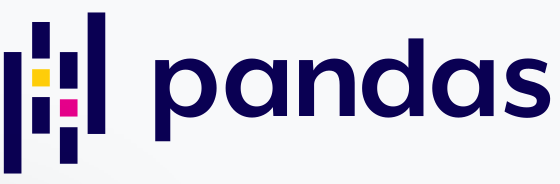| DataFrame, Series   | Data manipulation, cleaning, filtering, grouping, merging, and more | Easy to use, but can be complex for beginners due to its many features and options |


## Numerical Computing Libraries

| Library                                                                    | Main Data Structure | Main Functionality                                                    | Ease of Use                                                                                                                       |
| -------------------------------------------------------------------------- | ------------------- | --------------------------------------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| NumPy 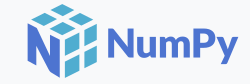 | ndarray             | Mathematical operations, linear algebra, Fourier transforms, and more | Difficult for beginners due to its array-oriented programming model and syntax, but essential for many scientific computing tasks |

## Data Visualization Libraries

| Library                                                                              | Main Data Structure          | Main Functionality                                                              | Ease of Use                                                                                                            |
| ------------------------------------------------------------------------------------ | ---------------------------- | ------------------------------------------------------------------------------- | ---------------------------------------------------------------------------------------------------------------------- |
| Matplotlib 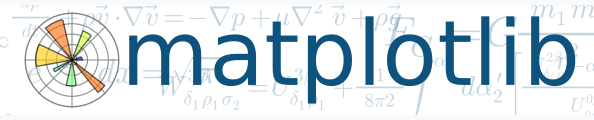| None (built on NumPy arrays) | Line plots, scatter plots, bar charts, histograms, and more                     | Somewhat difficult for beginners due to its verbose syntax and configuration options                                   |
| Altair   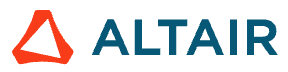       | Chart objects                | Declarative visualization syntax, interactive visualizations, Vega-Lite support | Easy to learn and use, but may require some knowledge of Vega-Lite and web development concepts                        |
| Plotly 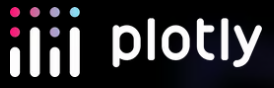  | Figure objects               | Interactive visualizations, web-based visualizations, sharing and collaboration | Easy to use and preferred for its powerful online sharing and collaboration features                                   |
| Bokeh  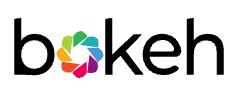      | Figure objects               | Interactive visualizations, web-based visualizations, streaming data            | Can be complex for beginners due to its reliance on JavaScript and web development concepts, but powerful and flexible |
| Seaborn  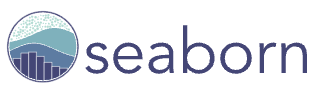 | DataFrame, Series            | Statistical graphics, data exploration, data visualization                      | Easy to use and preferred for its streamlined and intuitive interface                                                  |

## Geospatial Visualization Libraries

| Library                                                                              | Main Data Structure         | Main Functionality                                                          | Ease of Use                                                                                                                   |
| ------------------------------------------------------------------------------------ | --------------------------- | --------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------- |
| Geoplotlib 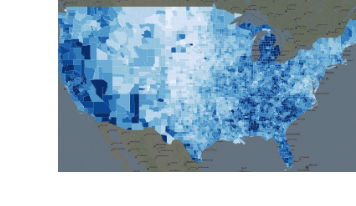| Layer objects, Data objects | Maps, point and density plots, animations, interactivity                    | Low-level and customizable interface that can be difficult for beginners, but powerful tools for working with geospatial data |
| Leaflet 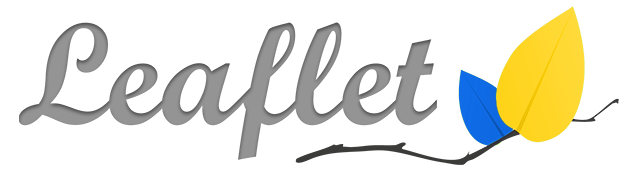| Map objects, Layer objects  | Maps, markers, shapes, heatmaps, interactivity                              | Easy to use and preferred for its ease of use and web-based interactivity features                                            |
| D3.js 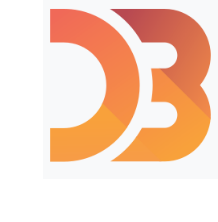| SVG objects, HTML elements  | Web-based visualizations, custom visualizations, interactive visualizations | Powerful library, but can be difficult for beginners due to its steep learning curve and complex syntax                       |
| ggplot  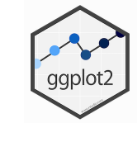 | DataFrame                   | Grammar of Graphics syntax, statistical graphics, data exploration          | Powerful library based on the Grammar of Graphics syntax, but may require some knowledge of R and statistical concepts        |


# Conclusion
- This tutorial introduced learners to working with soil data in Python
- Learners generated random soil data using NumPy, created a Pandas DataFrame, filtered and selected data, categorized it by pH level, and visualized the data using Matplotlib
- While Pandas is a powerful library for data manipulation and analysis, PyArrow is a useful alternative that can be more memory-efficient for working with really large datasets through out-of-core processing. 
- PyArrow also offers better compatibility with other tools in the data science and big data ecosystems, like Apache Spark and Dask.
- The table at the end of the tutorial listed some of the most popular libraries in Python for data manipulation, numerical computing, data visualization, and geospatial visualization
- The listed libraries can be useful for learners who want to expand their knowledge of Python data analysis beyond soil data
- Overall, this tutorial provides a solid foundation for beginners in Python programming and data analysis to explore and analyze datasets using Python.

*Keywords: Python, soil data, NumPy, Pandas, Matplotlib, sample data, DataFrame, visualization, pH level, plant growth, location, composition, decision-making, PyArrow.*